In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import h5py
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pickle

# Define variables

In [2]:
size = 50
NUM_CLASSES = 31

# Preprocess Image

In [3]:
def preprocess(img):
    ppc = 7
    resized = cv2.resize(img, (size + 0, size), interpolation = cv2.INTER_AREA)
#     fd,hog_image = hog(resized, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualise=True)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
#     resized = resized.reshape(size, size, 1)
    res = gray.reshape((size + 0) * size)
#     print(res.shape)
#     print(resized.shape)
#     plt.imshow(resized)
    return res

# Load Weight

In [4]:
# load the model from disk
filename = 'finalized_model.sav'
knn = pickle.load(open(filename, 'rb'))

In [6]:
test_img = cv2.imread('plate_digit_text_test/21/001.png')
test_img = preprocess(test_img)
test_array = []
test_array.append(test_img)
y_pred = knn.predict(test_array)
print(y_pred)

[21]


# Extract Number and Character

501.0
answer:  [27]
924.0
answer:  [27]
1397.0
answer:  [3]
1371.5
answer:  [2]
1383.0
answer:  [5]
1241.0
answer:  [7]
1042.5
answer:  [0]
1021.5
answer:  [6]
2206.0
answer:  [6]
605.0
answer:  [0]
1021.5
answer:  [1]
1169.5
answer:  [19]
589.0
answer:  [27]
515.0
answer:  [27]


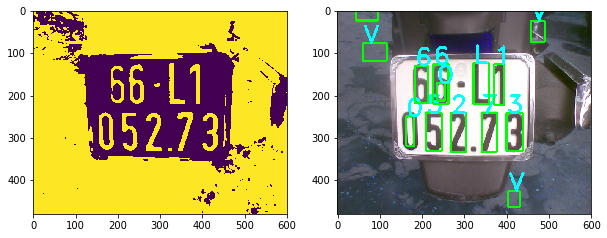

In [40]:
label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'
        , 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K', 'L', 'M', 'N', 'P', 'R', 'S', 'T', 'U', 'V', 'X', 'Z', 'Y']

im = cv2.imread('data/Bike_back/56.jpg')
im_copy = im.copy()
# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)
       
# Threshold the image
ret, im_th = cv2.threshold(im_gray, 110, 255, cv2.THRESH_BINARY_INV)
fig=plt.figure(figsize=(10, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(im_th)

# Find contours in the image
ima, ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

if len(ctrs) > 0:
    for contour in ctrs:
        if ((cv2.contourArea(contour) > 500) and (cv2.contourArea(contour) < 2500)):
            # Get rectangles contains each contour
            rect = cv2.boundingRect(contour)
            x, y, width, height = cv2.boundingRect(contour)
            area = cv2.contourArea(contour)
            print(area)
            # Draw the rectangles
            cv2.rectangle(im_copy, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
#             cv2.drawContours(im, contour, 0, (0,255,0), 3)
#             Make the rectangular region around the digit
            leng = int(rect[3] * 1.6)
            pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
            pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
#             roi_origin = im[pt1:pt1+leng, pt2:pt2+leng]
            roi_origin = im[y:y+height, x:x+width]
#             Preprocess
            roi = preprocess(roi_origin)
#             roi = np.array(roi)
            
            array = []
            array.append(roi)
            
            predictions = knn.predict(array)
            
            cv2.putText(im_copy, str(label[int(predictions)]), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)

            print('answer: ',predictions)
#             cv2.imshow('roi_origin', roi_origin)
#             cv2.waitKey()

fig.add_subplot(1, 2, 2)
plt.imshow(im_copy)
# cv2.imshow('roi_origin', im_copy)
# cv2.waitKey()